# CapStone Project 

## Topic: House Price prediction

In [37]:
#Importing the necessary packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Loading Training dataset into dataframe
df= pd.read_csv('capstone_data/train.csv')

In [39]:
# First 5 rows in the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
#DataFrame shape
df.shape

(1460, 81)

In [41]:
# DataFrame Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
# Finding the NULL entries per columns
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

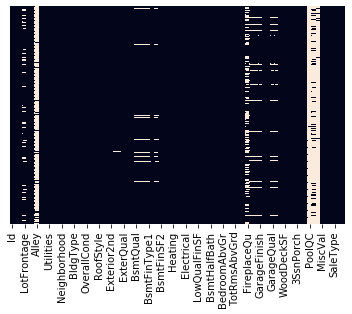

In [42]:
#Creating a heapmap plotting the NULL entries in the columns.
# The white bar represents the missing values.
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [73]:
# Taking care of the missing values/ features in the same order as they appear.

# Handling LotFrontage, replace NULL values with mean
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

# Handling FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond
df['FireplaceQu']= df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['BsmtQual']= df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']= df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']= df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']= df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']= df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType']= df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageType']= df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']= df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']= df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']= df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])



In [61]:
# Handling Alley, PoolQC, Fence, MiscFeature, dropping the column itself.
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)


In [74]:
# Cleaned DataFrame Verification #1
# As seen, no NULL values could be observed.
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [75]:
# Cleaned DataFrame verification #2
#As shown, all the columns contain 1460 non-null entries.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

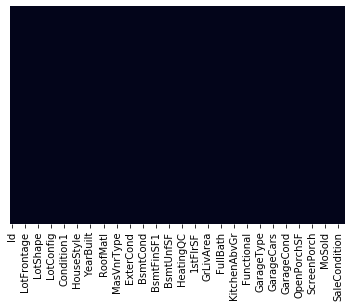

In [78]:
# Cleaned DataFrame Verification #3
# Checking the same graphically.
# Comparing the generated heatmap from the one generated above, We could observe no NULL entries here.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [72]:
# Getting the new DataFrame shape
df.shape

(1460, 77)

In [80]:
# First 10 entries in the DataFrame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
